#### Library to work with DMSP SSJ CDF files

In [61]:
# Data structures
import pandas as pd
import numpy as np
from spacepy import pycdf

# General 
import os
from os.path import isfile, join
import sys
import glob
import datetime
from random import *

# Visualization
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm



In [45]:
def dmsp_ssj_cdf_to_dataframe(directoryname,filename):
    ds = pycdf.CDF(os.path.join(filedirectory,filenames[0]))
    
    print('Variables in the file: ')
    # See the variable names in the file
    for i in ds:
        print('variable name = {}'.format(i))
    print('\n\n')
    
    
    df = pd.DataFrame()
    channel_energies = ds['CHANNEL_ENERGIES'][...]
    df['datetime'] = pd.Series(ds['Epoch'][...])

    for i in ds:
        # DataFrame
        if (i == 'SC_GEOCENTRIC_LAT'):
            df[i] = pd.Series(ds[i][...])
        elif (i == 'SC_GEOCENTRIC_LON'):
            df[i] = pd.Series(ds[i][...])
        elif (i == 'SC_GEOCENTRIC_R'):
            df[i] = pd.Series(ds[i][...])
        elif (i == 'SC_AACGM_LAT'):
            df[i] = pd.Series(ds[i][...])
        elif (i == 'SC_AACGM_LON'):
            df[i] = pd.Series(ds[i][...])
        elif (i == 'SC_AACGM_LTIME'):
            df[i] = pd.Series(ds[i][...])
        elif (i == 'ELE_DIFF_ENERGY_FLUX'):
            for j in range(ds[i].shape[1]):
                df['ELE_DIFF_ENERGY_FLUX: channel energy=' + str(channel_energies[j])] = pd.Series(ds[i][:,j])
        elif (i == 'ELE_DIFF_ENERGY_FLUX_STD'):
            for j in range(ds[i].shape[1]):
                df['ELE_DIFF_ENERGY_FLUX_STD: channel energy=' + str(channel_energies[j])] = pd.Series(ds[i][:,j])
        elif (i == 'ELE_TOTAL_ENERGY_FLUX'):
            df[i] = pd.Series(ds[i][...])
        elif (i == 'ELE_TOTAL_ENERGY_FLUX_STD'):
            df[i] = pd.Series(ds[i][...])
        elif (i == 'ELE_AVG_ENERGY'):
            df[i] = pd.Series(ds[i][...])
        elif (i == 'ELE_AVG_ENERGY_STD'):
            df[i] = pd.Series(ds[i][...])
        elif (i == 'AURORAL_REGION'):
            df[i] = pd.Series(ds[i][...])
        elif (i == 'AURORAL_BOUNDARY_FOM'):
            df[i] = pd.Series(ds[i][...])
        elif (i == 'ORBIT_INDEX'):
            df[i] = pd.Series(ds[i][...])
            
    df = df.set_index('datetime')
    df.index = pd.to_datetime(df.index)
    
    return df


def nearest(items, pivot):
    #return min(items, key=lambda x: abs(x - pivot))
    return np.argmin(abs(items - pivot))



In [ ]:
### Sample use script for SSJ reader

In [22]:
filedirectory = '/Users/ryanmcgranaghan/Documents/DMSPdata/2015/'
filenames = ['dmsp-f16_ssj_precipitating-electrons-ions_20150317_v1.1.3.cdf',
             'dmsp-f17_ssj_precipitating-electrons-ions_20150317_v1.1.3.cdf',
             'dmsp-f18_ssj_precipitating-electrons-ions_20150317_v1.1.3.cdf']

ctr = 0
for f in filenames:
    print('working on file {}'.format(f))
    if ctr == 0:
        df16 = dmsp_ssj_cdf_to_dataframe(filedirectory,f)
    elif ctr == 1:
        df17 = dmsp_ssj_cdf_to_dataframe(filedirectory,f)
    elif ctr == 2:
        df18 = dmsp_ssj_cdf_to_dataframe(filedirectory,f)
    
    ctr += 1


working on file dmsp-f16_ssj_precipitating-electrons-ions_20150317_v1.1.3.cdf
Variables in the file: 
variable name = Epoch
variable name = SC_ECI
variable name = SC_ECI_LABEL
variable name = SC_GEOCENTRIC_LAT
variable name = SC_GEOCENTRIC_LON
variable name = SC_GEOCENTRIC_R
variable name = SC_AACGM_LAT
variable name = SC_AACGM_LON
variable name = SC_AACGM_LTIME
variable name = CHANNEL_ENERGIES
variable name = ELE_COUNTS_OBS
variable name = ELE_COUNTS_BKG
variable name = ELE_GEOMETRIC
variable name = ELE_DIFF_ENERGY_FLUX
variable name = ELE_DIFF_ENERGY_FLUX_STD
variable name = ELE_TOTAL_ENERGY_FLUX
variable name = ELE_TOTAL_ENERGY_FLUX_STD
variable name = ELE_AVG_ENERGY
variable name = ELE_AVG_ENERGY_STD
variable name = ION_COUNTS_OBS
variable name = ION_COUNTS_BKG
variable name = ION_GEOMETRIC
variable name = ION_DIFF_ENERGY_FLUX
variable name = ION_DIFF_ENERGY_FLUX_STD
variable name = ION_TOTAL_ENERGY_FLUX
variable name = ION_TOTAL_ENERGY_FLUX_STD
variable name = ION_AVG_ENERGY
varia

In [23]:
df16
# df16 = df16.set_index('datetime')
# df16.index = pd.to_datetime(df16.index)

,SC_GEOCENTRIC_LAT,SC_GEOCENTRIC_LON,SC_GEOCENTRIC_R,SC_AACGM_LAT,SC_AACGM_LON,SC_AACGM_LTIME,ELE_DIFF_ENERGY_FLUX: channel energy=30000.0,ELE_DIFF_ENERGY_FLUX: channel energy=20400.0,ELE_DIFF_ENERGY_FLUX: channel energy=13900.0,ELE_DIFF_ENERGY_FLUX: channel energy=9450.0,...,ELE_DIFF_ENERGY_FLUX_STD: channel energy=65.0,ELE_DIFF_ENERGY_FLUX_STD: channel energy=44.0,ELE_DIFF_ENERGY_FLUX_STD: channel energy=30.0,ELE_TOTAL_ENERGY_FLUX,ELE_TOTAL_ENERGY_FLUX_STD,ELE_AVG_ENERGY,ELE_AVG_ENERGY_STD,AURORAL_REGION,ORBIT_INDEX,AURORAL_BOUNDARY_FOM
datetime,,,,,,,,,,,,,,,,,,,,,
2015-03-17 00:00:00,-31.287591,62.010072,7229.622337,0.000000,0.0000,12.000000,0.0,0.000000,0.000000,0.000000e+00,...,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,0.0,0.0,0.0
2015-03-17 00:00:01,-31.345498,61.993742,7229.621452,0.000000,0.0000,12.000000,0.0,0.000000,0.000000,0.000000e+00,...,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,0.0,0.0,0.0
2015-03-17 00:00:02,-31.403405,61.977396,7229.620561,0.000000,0.0000,12.000000,0.0,0.000000,0.000000,0.000000e+00,...,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,0.0,0.0,0.0
2015-03-17 00:00:03,-31.461313,61.961036,7229.619665,0.000000,0.0000,12.000000,0.0,0.000000,0.000000,0.000000e+00,...,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,0.0,0.0,0.0
2015-03-17 00:00:04,-31.519217,61.944660,7229.618763,0.000000,0.0000,12.000000,0.0,0.000000,0.000000,1.987144e+05,...,NaN,NaN,NaN,7.392174e+08,1.743559,9450.000000,2.465765,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-17 23:59:55,-75.158793,32.164897,7227.938934,-43.415357,289.2403,7.282687,0.0,0.000000,222830.390625,5.961431e+05,...,0.288926,0.277555,0.275162,1.064721e+11,0.086593,1239.760010,0.110737,0.0,-14.0,0.0
2015-03-17 23:59:56,-75.206278,32.025041,7227.937177,-43.415357,289.2403,7.282687,0.0,255046.796875,222830.390625,1.987144e+05,...,0.204988,0.205239,0.207504,1.513161e+11,0.069678,398.244446,0.095466,0.0,-14.0,0.0
2015-03-17 23:59:57,-75.253681,31.884336,7227.935424,-43.415357,289.2403,7.282687,0.0,0.000000,445660.781250,9.935718e+05,...,0.261861,0.218251,0.237473,1.200831e+11,0.083259,1070.143433,0.104950,0.0,-14.0,0.0


<IPython.core.display.Javascript object>


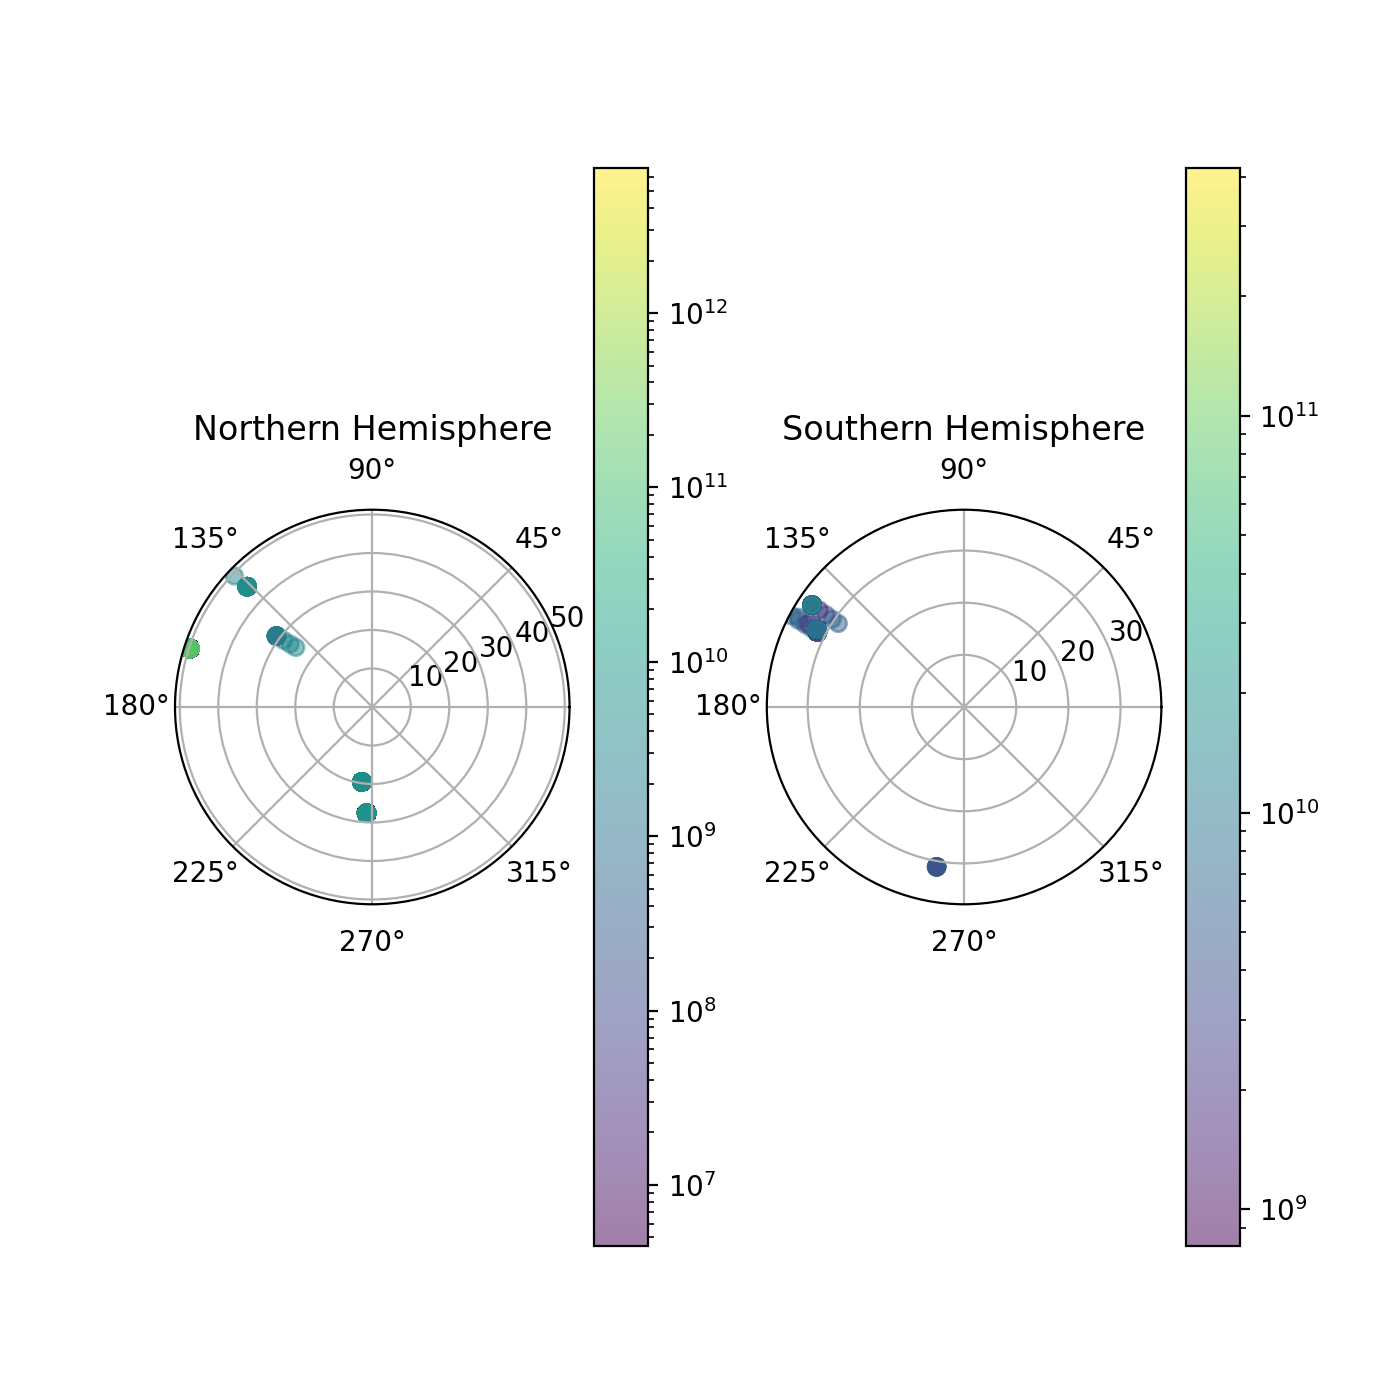

Text(0.5, 1.0, 'Southern Hemisphere')

In [102]:
# Developing the plotting functions

dt_low = datetime.datetime(2015,3,17,12)
dt_high = datetime.datetime(2015,3,17,14)

# try:
#     df_plot = df16.copy(deep=True)
#     df_plot = df_plot[ (df_plot.index > dt_low) & (df_plot.index < dt_high) ]
# except: 
#     print('invalid datetime bound passed')
# #     return None
    
df_plot_idx_low = nearest(df_plot.index,dt_low)
df_plot_idx_high = nearest(df_plot.index,dt_high)
df_plot = df_plot[df_plot_idx_low:df_plot_idx_high]

df_plot_NH = df_plot.copy().loc[df_plot['SC_AACGM_LAT'] > 40.]
df_plot_SH = df_plot.copy().loc[df_plot['SC_AACGM_LAT'] < -40.]
df_plot_SH.loc[:,'SC_AACGM_LAT'] = df_plot_SH['SC_AACGM_LAT'].abs()


fig = plt.figure(figsize=(7,7))

ax1 = plt.subplot(121,polar=True)
ctf = ax1.scatter(df_plot_NH['SC_AACGM_LTIME'] / 24. * (2*np.pi),
                  90-(df_plot_NH['SC_AACGM_LAT']),
                  c=df_plot_NH['ELE_TOTAL_ENERGY_FLUX'],
                  alpha=0.5,
                  norm=LogNorm()) 
cbar = fig.colorbar(ctf,ax=ax1,)#ticks=[0,1,2,3])
plt.title('Northern Hemisphere')

ax2 = plt.subplot(122,polar=True)
ctf = ax2.scatter(df_plot_SH['SC_AACGM_LTIME'] / 24. * (2*np.pi),
                  90-(df_plot_SH['SC_AACGM_LAT']),
                  c=df_plot_SH['ELE_TOTAL_ENERGY_FLUX'],
                  alpha=0.5,
                  norm=LogNorm()) 
cbar = fig.colorbar(ctf,ax=ax2,)#ticks=[0,1,2,3])
plt.title('Southern Hemisphere')



In [57]:
df_plot

,SC_GEOCENTRIC_LAT,SC_GEOCENTRIC_LON,SC_GEOCENTRIC_R,SC_AACGM_LAT,SC_AACGM_LON,SC_AACGM_LTIME,ELE_DIFF_ENERGY_FLUX: channel energy=30000.0,ELE_DIFF_ENERGY_FLUX: channel energy=20400.0,ELE_DIFF_ENERGY_FLUX: channel energy=13900.0,ELE_DIFF_ENERGY_FLUX: channel energy=9450.0,...,ELE_DIFF_ENERGY_FLUX_STD: channel energy=65.0,ELE_DIFF_ENERGY_FLUX_STD: channel energy=44.0,ELE_DIFF_ENERGY_FLUX_STD: channel energy=30.0,ELE_TOTAL_ENERGY_FLUX,ELE_TOTAL_ENERGY_FLUX_STD,ELE_AVG_ENERGY,ELE_AVG_ENERGY_STD,AURORAL_REGION,ORBIT_INDEX,AURORAL_BOUNDARY_FOM
datetime,,,,,,,,,,,,,,,,,,,,,
2015-03-17 12:00:00,-54.026490,235.185033,7228.846926,70.381555,82.104782,17.473652,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,5.707862e+07,0.734212,543.192871,1.029111,0.0,-7.0,0.0
2015-03-17 12:00:01,-54.083331,235.155111,7228.844716,70.381555,82.104782,17.473652,0.0,0.0,0.0,0.0,...,1.743560,NaN,NaN,1.921802e+07,1.025410,96.175690,1.441805,0.0,-7.0,0.0
2015-03-17 12:00:02,-54.140165,235.125118,7228.842504,70.381555,82.104782,17.473652,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,3.647546e+07,0.616098,120.044876,0.874952,0.0,-7.0,0.0
2015-03-17 12:00:03,-54.196997,235.095052,7228.840291,70.381555,82.104782,17.473652,0.0,0.0,0.0,0.0,...,1.743560,NaN,NaN,1.260422e+08,1.675994,926.346924,2.086567,0.0,-7.0,0.0
2015-03-17 12:00:04,-54.253820,235.064917,7228.838077,70.381555,82.104782,17.473652,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,0.0,-7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-17 13:59:54,-60.393296,52.930549,7227.384098,-58.096451,332.186292,10.145753,0.0,0.0,0.0,0.0,...,0.218801,0.237473,0.251507,1.261520e+10,0.092562,160.537247,0.122816,0.0,-8.0,0.0
2015-03-17 13:59:55,-60.337270,52.890074,7227.384081,-58.096451,332.186292,10.145753,0.0,0.0,0.0,0.0,...,0.229474,0.249444,0.261861,1.073356e+10,0.097096,180.645813,0.127442,0.0,-8.0,0.0
2015-03-17 13:59:56,-60.281233,52.849723,7227.384066,-58.096451,332.186292,10.145753,0.0,0.0,0.0,0.0,...,0.235339,0.258896,0.288926,8.507773e+09,0.095005,172.571854,0.127034,0.0,-8.0,0.0


In [9]:
%matplotlib notebook
plt.ion()

fig = plt.figure(figsize=(6,10))
gs = GridSpec(3,1, figure=fig)

# ax0 = fig.add_subplot(gs[0,0])
ax0 = plt.subplot(gs[0,0])
ax_out0 = ax0.scatter(df_plot.index,
            df_plot['ELE_TOTAL_ENERGY_FLUX'],
            c = 'b',
            alpha = 1,
            s=30, 
            edgecolor='',
            label='Observation'
           )
ax0.scatter(df_plot[df_plot['AURORAL_REGION']==0].index,
            np.tile(3e13,(len(df_plot[df_plot['AURORAL_REGION']==0]),1)),
            c = 'k',
            alpha = 0.2,
            s=20, 
            edgecolor='',
            label='No Boundary'
           )
ax0.scatter(df_plot[df_plot['AURORAL_REGION']==1].index,
            np.tile(3e13,(len(df_plot[df_plot['AURORAL_REGION']==1]),1)),
            c = 'r',
            alpha = 0.2,
            s=20, 
            edgecolor='',
            label='Eq of AO'
           )
ax0.scatter(df_plot[df_plot['AURORAL_REGION']==2].index,
            np.tile(3e13,(len(df_plot[df_plot['AURORAL_REGION']==2]),1)),
            c = 'b',
            alpha = 0.2,
            s=20, 
            edgecolor='',
            label='AO'
           )
ax0.scatter(df_plot[df_plot['AURORAL_REGION']==3].index,
            np.tile(3e13,(len(df_plot[df_plot['AURORAL_REGION']==3]),1)),
            c = 'm',
            alpha = 0.2,
            s=20, 
            edgecolor='',
            label='Pol of AO'
           )
ax0.set_xlim([df_plot.index[0],df_plot.index[-1]])
ax0.grid(True)
ax0.set_ylabel('[ev/cm^2/ster/s]')
# ax0.set_ylabel('log10[ev/cm^2/s/str]')
ax0.set_xticklabels('')
ax0.legend()


ax3 = plt.subplot(gs[1,0],sharex=ax0)
ax_out = ax3.scatter(df_plot.index,
            df_plot['SC_AACGM_LAT'],
            alpha = 1.0,
            c = 'k',
            s=30, 
            edgecolor='',
           )
ax3.set_xlim([df_plot.index[0],df_plot.index[-1]])
ax3.grid(True)
ax3.set_ylabel('MLAT [degrees]')
ax3.set_xticklabels('')


ax4 = plt.subplot(gs[2,0],sharex=ax0)
ax_out = ax4.scatter(df_plot.index,
            df_plot['SC_AACGM_LTIME'],
            alpha = 1.0,
            c = 'k',
            s=30, 
            edgecolor='',
           )
ax4.set_xlim([df_plot.index[0],df_plot.index[-1]])
ax4.grid(True)
ax4.set_ylabel('MLT [hours]')
# ax4.set_xticklabels('')



plt.xticks(rotation = 90)

plt.show()

NameError: name 'plt' is not defined